
#  Natural Language Processing - Airline Twitter Sentiment Analysis

# Charles Kilpatrick

# **Background and Context:**

Millions of people are active Twitter users, which allows businesses to reach a broad population and connect with customers with no intermediary. On the other hand, there is so much information that it is difficult for brands to quickly detect negative social mentions that could harm their business. For this reason, sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Scrapped twitter data including comments on major US airline corporations is used for this project. The data contributors classified tweets as positive, negative, and neutral, followed by categorizing negative tweets, such as "late flight" or "rude service". This project will explore the numerous features of this data.

A classification model will be developed where we will be able to tag the rating based on the description and rate them as positive, neutral, or negative. Score, summary, description, and score based sentiment features will be focused on.**

## **Learning Outcomes To Be Demonstrated:**

* Implementation of text pre-processing.
* Understanding of steps subsequent to text pre-processing
* Understanding of Bag of words
* Understanding of Tf-idf
* Building the classification model.
* Evaluating the model

##**Data Description:**
Twitter data related to major US airlines was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). The dataset features are presented below.

##**Dataset:**

The dataset has the following columns:

* tweet_id
* airline_sentiment
* airline_sentiment_confidence
* negativereason
* negativereason_confidence
* airline
* airline_sentiment_gold
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone

In [1]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.1 MB/s eta 0:00:00


In [2]:
# install and import necessary libraries.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#!pip install contractions
import pandas as pd
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.


#nltk.download('stopwords')                              # Download Stopwords.
#nltk.download('punkt')
#nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

# Use GPU if available

In [3]:
import tensorflow as tf

# Get the list of available physical devices
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    # If a GPU is available, use it
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    device = "/GPU:0"
    print("Using GPU")
else:
    # If no GPU is available, use CPU
    device = "/CPU:0"
    print("Using CPU")


Using GPU


## **Import Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read data
data=pd.read_csv('drive/My Drive/Tweets.csv')

In [6]:
# Save a copy of the data
df = data.copy()

## **View DataFrame And Perform Initial Data Check**

In [7]:
# Investigate dataframe shape
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 14640 rows and 15 columns.


In [8]:
# Display full dataframe information (Non-turncated Text column.)
pd.set_option('display.max_colwidth', None)

In [9]:
# Print first 5 rows of data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### **Observations**
* There are a total of 15 columns
* The target column is airline_sentiment
* The independent variable column is text
* Significant text pre=processing will be required

In [10]:
# Establish consistent random sampling and print a random sample
np.random.seed(1)
data.sample(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8515,568198336651649027,positive,1.0000,NaN,NaN,Delta,NaN,GenuineJack,NaN,0,@JetBlue I'll pass along the advice. You guys rock!!,NaN,2015-02-18 16:00:14 -0800,Massachusetts,Central Time (US & Canada)
3439,568438094652956673,negative,0.7036,Lost Luggage,0.7036,United,NaN,vina_love,NaN,0,@united I sent you a dm with my file reference number.. I just want to know if someone has located my bag even if it's not here yet.,NaN,2015-02-19 07:52:57 -0800,ny,Quito
6439,567858373527470080,positive,1.0000,NaN,NaN,Southwest,NaN,Capt_Smirk,NaN,0,@SouthwestAir Black History Commercial is really sweet. Well done.,NaN,2015-02-17 17:29:21 -0800,La Florida,Eastern Time (US & Canada)
5112,569336871853170688,negative,1.0000,Late Flight,1.0000,Southwest,NaN,scoobydoo9749,NaN,0,@SouthwestAir why am I still in Baltimore?! @delta is doing laps around us and laughing about it. # ridiculous,"[39.1848041, -76.6787131]",2015-02-21 19:24:22 -0800,"Tallahassee, FL",America/Chicago
5645,568839199773732864,positive,0.6832,NaN,NaN,Southwest,NaN,laurafall,NaN,0,@SouthwestAir SEA to DEN. South Sound Volleyball team on its way! http://t.co/tN5cXCld6M,NaN,2015-02-20 10:26:48 -0800,NaN,Pacific Time (US & Canada)
1380,569748884164988929,negative,1.0000,Flight Attendant Complaints,0.6818,United,NaN,JacquieMae08,NaN,1,@united One of your workers refused to give me her name as a reference for my notes. Her tone &amp; language was very unprofessional.,NaN,2015-02-22 22:41:34 -0800,SD || CA,Arizona
12674,570066226233417728,negative,1.0000,Bad Flight,0.6966,American,NaN,lczand,NaN,0,@AmericanAir seats that were assigned are inappropriate for child this age. AA knew age of child.,NaN,2015-02-23 19:42:34 -0800,SE USA,Central Time (US & Canada)
13475,569853969469734912,negative,1.0000,Customer Service Issue,0.3642,American,NaN,Davitossss,NaN,0,@AmericanAir now you change my gate and don't tell me? What the fuck is wrong with you people. Learn to do your fucken job,NaN,2015-02-23 05:39:08 -0800,NaN,NaN
9630,569771270839013376,negative,1.0000,Late Flight,1.0000,US Airways,NaN,jakenemmasmom,NaN,0,@USAirways What a mess caused by the computer systems. Flight 719 in 3 hours Late Flight and now no gate for us. Est 26 min wait.,NaN,2015-02-23 00:10:31 -0800,NaN,NaN
3745,568157451729526784,negative,1.0000,Customer Service Issue,0.6803,United,NaN,HeHaithMe,NaN,1,"@united How come you are the ONLY airline, of 90+ flights last year that makes me check my carry-on. Not even gate check...baggage claim?!?",NaN,2015-02-18 13:17:47 -0800,Born/Raised in 314/Home is 317,Eastern Time (US & Canada)


In [11]:
# Print last 5 rows of dataframe
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [12]:
# Print dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### **Observations**
* tweet_id - There are 14640 integer values which identify individual tweets.  It is not a key variable for this study
* airline_sentiment - There are 14640 values and this is the target value which is either negative, neutral, or positive
* airline_sentiment_confidence - There are 14640 non-null float values. This will be investigated in the EDA
* negativereason - There are 9178 non-null object values and also has a significant number of null value
* negativereason_confidence - There are 10522 non-null floating values
* airline - There are 14640 non-null object values which represent the 6 airlines included in the study
* airline_sentiment_gold - There are a total of 40 non-null object values.  Most of the values are null
* name- There are a total of 14640 non-null object variables. The tweeter name variable is not significant for this study
* negativereason_gold - There are a total of 32 non-null object values. The great majority of values are null
* retweet_count - There are 14640 non-null integer values
* text - There are 14640 non-null object values.  This is the independent variable which requires pre-processing
* tweet_coord - There are 1019 non-null variables in the form of a list. Most of the values are null
* tweet_created - There are 14640 non-null object values containing the exact time that tweets were created
* tweet_location - There are 9907 non-null object values providing the place name where tweets were originated.  
* user_timezone - There are 9820 non-null object values providing the time zone where a tweet originated. Many values are null


In [13]:
# Calculate sum of duplicated values for tweet_id
data["tweet_id"].duplicated().sum()

155

* There are a total of 155 tweets that are exact duplicates of previous tweets. These are duplicates for all parameters.

In [14]:
# Filter dataframe for duplicates of tweet_id
df_duplicates = data[data["tweet_id"].duplicated() == True]

In [15]:
# Print out the tweet_id's of duplicated tweets
numerical_data = []
for value in df_duplicates["tweet_id"]:
   numerical_data.append(value)
print("Duplicate tweet_id list:", numerical_data)

Duplicate tweet_id list: [570308309682675712, 570308064185880577, 570307949614256128, 570307948171423745, 570307434113310720, 570307390752608257, 570307369328095232, 570307312675651585, 570306867878072320, 570306715599695874, 570306662575300611, 570306529947193344, 570306423818723328, 570306260010176512, 570306250442985473, 570305365159632899, 570305264613765122, 570305234838429696, 570305063052283904, 570305051819941889, 570304633048047616, 570304544128815104, 570303889754488832, 570303383782989824, 570302358242115584, 570302060035497984, 570301929580048385, 570301488192458752, 570301395141836801, 570300915418320897, 570300355843661824, 570300262302289920, 570300177367633921, 570299824760860672, 570299252141903873, 570298770136674304, 570298744723415040, 570298679250305024, 570298644475346945, 570298371140939776, 570298285350629376, 570298117544906754, 570297548726005761, 570297479029252097, 570297414848000000, 570297070998974464, 570296996445204480, 570296986827694080, 57029661668875

In [16]:
# Print an example of a duplicated tweet for informational purposes
target_value = 570308309682675712

result = data.loc[data["tweet_id"] == target_value]
print("Result:\n", result)

Result:
                  tweet_id airline_sentiment  airline_sentiment_confidence  \
11879  570308309682675712          negative                           1.0   
12040  570308309682675712          negative                           1.0   

               negativereason  negativereason_confidence   airline  \
11879  Customer Service Issue                        1.0  American   
12040  Customer Service Issue                        1.0  American   

      airline_sentiment_gold        name negativereason_gold  retweet_count  \
11879                    NaN  SweeLoTmac                 NaN              0   
12040                    NaN  SweeLoTmac                 NaN              0   

                                                                                                                                              text  \
11879  @AmericanAir why would I even consider continuing your point program when I received no perks or continued bad customer service? #senseless   
12040  @Am

###  **Observation**
* Duplicated tweets are perfect duplicates of previously recorded tweets including time, location, text, sentiment, and name.

In [17]:
# Delete the 155 duplicate tweets while retaining the original tweets
data.drop_duplicates(subset=["tweet_id"], keep = "first", inplace = True)

In [18]:
# Investigate dataframe shape
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 14485 rows and 15 columns.


## **EDA**

In [19]:
# Print dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14485 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14485 non-null  int64  
 1   airline_sentiment             14485 non-null  object 
 2   airline_sentiment_confidence  14485 non-null  float64
 3   negativereason                9082 non-null   object 
 4   negativereason_confidence     10416 non-null  float64
 5   airline                       14485 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14485 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14485 non-null  int64  
 10  text                          14485 non-null  object 
 11  tweet_coord                   1007 non-null   object 
 12  tweet_created                 14485 non-null  object 
 13  t

###  **Observations**
* tweet_id - There are 14485 non-null integer values.  This is not a key variable for this study
* airline_sentiment - There are 14485 values and this is the target value which is either negative, neutral, or positive
* airline_sentiment_confidence - There are 14485 non-null float values. This will be investigated in the EDA
* negativereason - There are 9082 non-null object values and also has a significant number of null values
* negativereason_confidence - There are 10416 non-null floating values.
* airline - There are 14485 non-null object values which represent the 6 airlines included in the study
* airline_sentiment_gold - There are a total of 32 non-null object values.  Most of the values are null
* name- There are a total of 14485 non-null object variables. The tweeter name variable is not significant for this study
* negativereason_gold - There are a total of 32 non-null object values. The great majority of values are null
* retweet_count - There are 14485 non-null integer values
* text - There are 14485 non-null object values.  This is the independent variable which requires pre-processing
* tweet_coord - There are 1007 non-null variables in the form of a list. Most of the values are null
* tweet_created - There are 14485 non-null object values containing the exact time that tweets were created
* tweet_location - There are 9798 non-null object values providing the place name where tweets were originated.  
* user_timezone - There are 9710 non-null object values providing the time zone where a tweet originated. Many values are null


In [20]:
# Print top 5 rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### **Observations**

* There are a total of 15 columns
* The target column is airline_sentiment
* The independent variable column is text
* Significant text pre=processing will be required

In [21]:
# Print description of numerical data
data.describe().T


,count,mean,std,min,25%,50%,75%,max
tweet_id,14485.0,5.692072e+17,7.756739e+14,5.675883e+17,5.685515e+17,5.694398e+17,5.698811e+17,5.703106e+17
airline_sentiment_confidence,14485.0,8.999581e-01,1.629615e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10416.0,6.378744e-01,3.306359e-01,0.000000e+00,3.603750e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14485.0,8.339662e-02,7.496320e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


### **Observations**
* Although tweet_id is an integer unique identifier, it is not important in the context of this study.
* airline_sentiment_confidence mean is 0.90, median is 1.00, minimum of 0.34, maximum is 1.00.  Standard deviation is 0.16.
* negativereason_confidence mean is 0.64, median is 0.67, the minimum is 0.00 and maximum is 1.00. Standard deviation is 0.33.
* retweet_count mean is 0.08, median is 0.00, minimum is 0.00 and maximum is 44.00.  Standard deviation is 0.75.

In [22]:
# Print number of unique values
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1018
negativereason                     10
negativereason_confidence        1403
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

### **Observations**
* tweet_id - There are 14485 unique integer values which identify individual tweets.  This is not a key variable for this study
* airline_sentiment - There are 3 values and this is the target value which is either negative, neutral, or positive
* airline_sentiment_confidence - There are 1018 unique float values.
* negativereason - There are 10 unique object values
* negativereason_confidence - There are 1403 unique floating values
* airline - There are 6 unique values which represent the 6 airlines included in the study
* airline_sentiment_gold - There are 3 unique values. Most of the values are null
* name- There are a total of 7701 variables. The tweeter name variable is not significant for this study
* negativereason_gold - There are a total of 13 unique values. The great majority of values are null
* retweet_count - There are 18 unique integer values
* text - There are 14427 unique values.  This is the independent variable which will require pre-processing
* tweet_coord - There are 832 unique values. Most of the values are null
* tweet_created - There are 14247 unique values containing the exact time that tweets were created
* tweet_location - There are 3081 unique object values providing the place name where tweets were originated  
* user_timezone - There are 85 unique values providing the time zone where a tweet originated. Many values are null

In [23]:
# Check for null values.
data.isnull().sum(axis=0).sort_values(ascending = False)

negativereason_gold             14453
airline_sentiment_gold          14445
tweet_coord                     13478
negativereason                   5403
user_timezone                    4775
tweet_location                   4687
negativereason_confidence        4069
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

### **Observations**
* negativereason_gold - There are a total of 14453 null values. The great majority of values are null
* airline_sentiment_gold - There are 14445 null values. Most of the values are null
* tweet_coord - There are 13478 null values. Most of the values are null
* negativereason - There are 5403 null object values
* user_timezone - There are 4775 null values providing the time zone where a tweet originated. Many values are null
* tweet_location - There are 4687 values providing the place name where tweets were originated  
* negativereason_confidence - There are 4069 null values
* tweet_id - There are no null values.  This is not a key variable for this study
* airline_sentiment - There are no null values and this is the target value which is either negative, neutral, or positive
* airline_sentiment_confidence - There are no null values
* airline - There are no null values for this variable
* name- There are no null values for this variable. The tweeter name variable is not significant for this study
* retweet_count - There are no null values for this variable
* text - There are no null values for this variable.  This is the independent variable which will require pre-processing
* tweet_created - There are no null values for this variable.

In [24]:
# Print airline value counts
data["airline"].value_counts()

United            3822
US Airways        2913
American          2604
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

### **Observations**
* The distribution of the tweet data by airline is unbalanced.
* Tweets concerning United totaled 3822 or 26.4% and this airline is overrepresented.
* Tweets concerning US Airways totaled 2913 or 20.1% and this airline is overrepresented.
* Tweets concerning American totaled 2604 or 18.0% and this airline is slightly overrated.
* Tweets concerning Southwest totaled 2420 or 16.7% and the tweet count for this airline is appropriate for data with 6 classes.
* Tweets concerning Delta totaled 2222 or 15.3%.
* Tweets concerning Virgin America totaled 504 or 3.5%.

In [25]:
# Print airline_sentiment value counts
data["airline_sentiment"].value_counts()

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

### **Observations**
* The airline sentiment tweet data is very imbalanced  
* The negative tweet count is 9082 or 62.7% and this class is greatly overrepresented
* The neutral tweet count is 3069 or 21.2% and this class is underrepresented
* The positive tweet count is 2334 or 16.1% and this class is significantly underrepresented

In [26]:
# Print airline_sentiment_confidence value counts
data["airline_sentiment_confidence"].value_counts()

1.0000    10326
0.6667       71
0.6632       35
0.6559       30
0.6596       30
          ...  
0.6905        1
0.9658        1
0.9160        1
0.6284        1
0.3487        1
Name: airline_sentiment_confidence, Length: 1018, dtype: int64

### **Observations**

* This data appears to be left skewed. The mode has a value of 1.0 which is 10326 out of 14485 values or 71.3%.

In [27]:
# Print negativereason value counts
data["negativereason"].value_counts()

Customer Service Issue         2885
Late Flight                    1650
Can't Tell                     1176
Cancelled Flight                829
Lost Luggage                    719
Bad Flight                      575
Flight Booking Problems         523
Flight Attendant Complaints     475
longlines                       177
Damaged Luggage                  73
Name: negativereason, dtype: int64

### **Observations**
* There were 5403 or 37.3% nulls values for this parameter.
* Customer Service Issue - This accounts for 2885 or 31.8% of the non-null data points.
* Late Flight - This accounts for 1650 or 18.2% of the non-null data points.
* Can't Tell - This accounts for 1176 or 12.9% of the non-null data points.
* Cancelled Flight - This accounts for 829 or 9.1% of the non-null data points.
* Lost Luggage - This accounts for 719 or 7.9% of the non-null data points.
* Bad Flight - This accounts for 575 or 6.3% of the non-null data points.
* Flight Booking Problems - This accounts for 5.8% of the non-null data points.
* Longlines - This accounts for 177 or 1.9% 0f the non-null data points.
* Damaged Luggage - This accounts for 73 or 0.8% of the non-null data points.

In [28]:
# Print retweet_count value counts
data["retweet_count"].value_counts()

0     13720
1       638
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

### **Observations**

* A total of 13720 or 94.7% of the tweets were sent only once.  A total of 5.3% were retweeted, usually retweeted once. A total of 22 tweets were retweeted 5 times or more.

In [29]:
# Print negativereason_confidence value counts
data["negativereason_confidence"].value_counts()

1.0000    3398
0.0000    1334
0.6667      62
0.6632      31
0.6596      29
          ... 
0.7052       1
0.3913       1
0.3255       1
0.3146       1
0.7255       1
Name: negativereason_confidence, Length: 1403, dtype: int64

### **Observations**

* A total of 3398 or 32.6% of the non-null data points have a value of 1.00.  A total of 1334 or 12.8% of the non-null values have a value of 0.0. This parameter has 4069 or 28.1% null values.

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

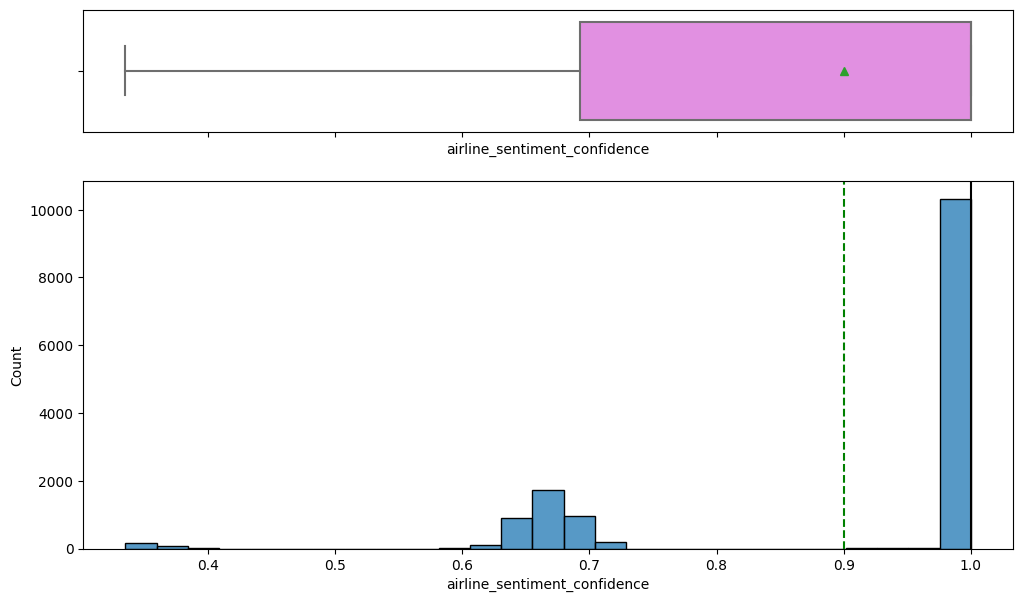

In [31]:
# Histogram boxplot of airline_sentiment_confidence
histogram_boxplot(data, "airline_sentiment_confidence")

### **Observations**

This data is very left skewed. The mode has a value of 1.0 which is 10326 out of 14485 values or 71.3%. The median value is 0.9 and there are no outliers. There are a small number of values with an approximate range of 0.6 to 0.73.  A lesser number of data points are less than 0.4. If a value of 1.0 indicates a high level of tweet confidence, then this twitter data would be considered credible.

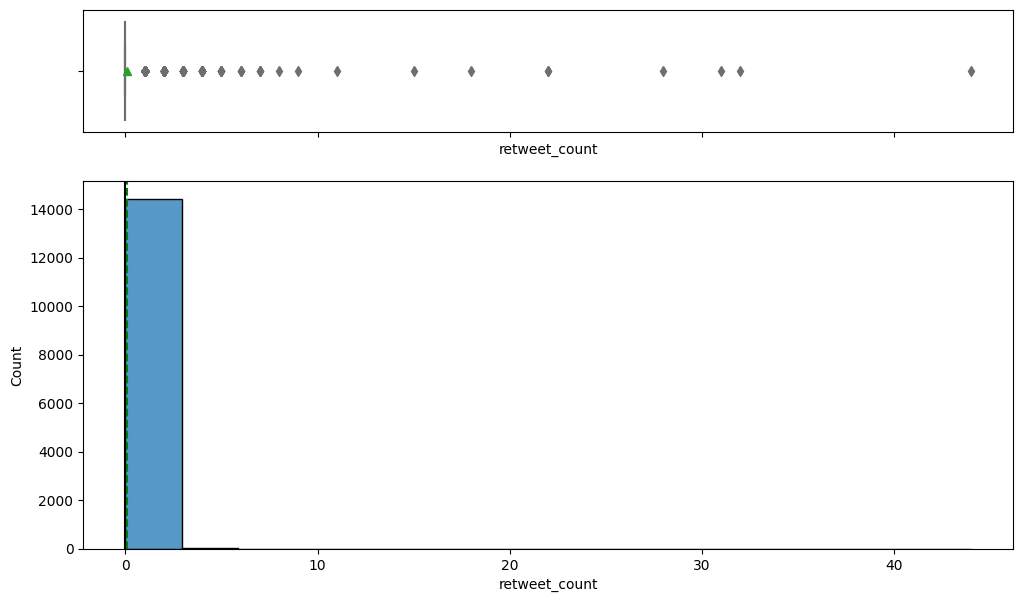

In [32]:
# Histogram boxplot of retweet_count
histogram_boxplot(data, "retweet_count")

### **Observations**

The retweet_count data is right skewed. 94.7% of the tweets were sent only once. The remainder were retweeted at values ranging up to 44 times.

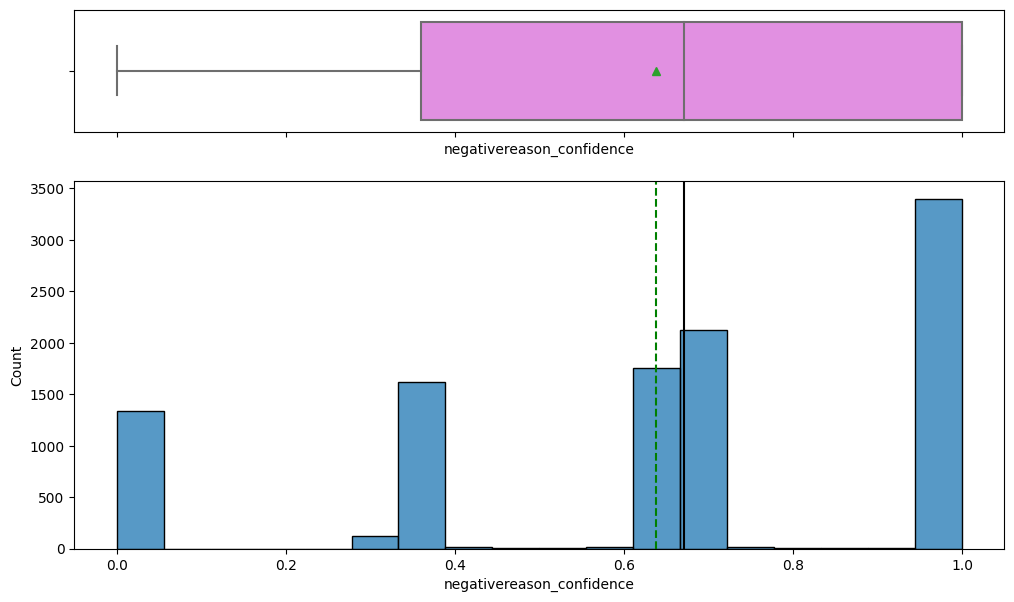

In [33]:
# Plot histogram_boxplot of negativereason_confidence
histogram_boxplot(data, "negativereason_confidence")

### **Observations**

negativereason_confidence mean is 0.64, median is 0.67, the minimum is 0.00 and maximum is 1.00. Standard deviation is 0.33. This data is left skewed.  If a value of 1.0 is interpreted to have a high confidence level, then this data should be considered to have an adequate level of confidence.

In [34]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

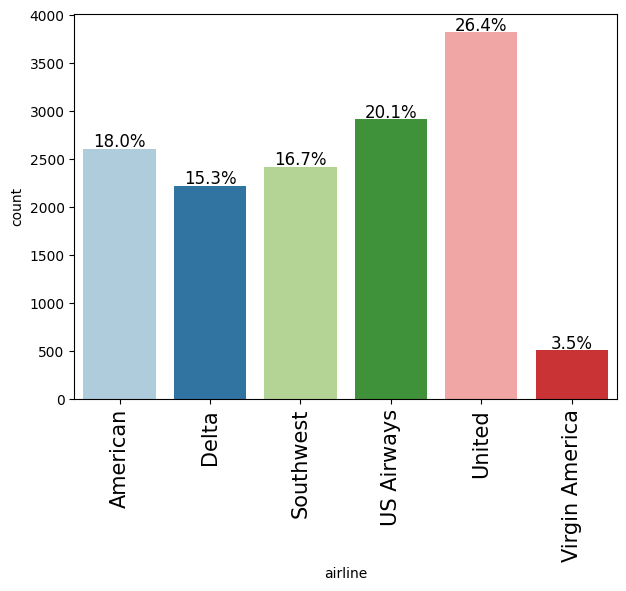

In [35]:
# Barplot of airline
labeled_barplot(data, "airline", perc = True)

### **Observations**
* The distribution of the tweet data by airline is unbalanced.
* Tweets concerning United totaled 3822 or 26.4% and this airline is overrepresented.
* Tweets concerning US Airways totaled 2913 or 20.1% and this airline is overrepresented.
* Tweets concerning American totaled 2604 or 18.0%
* Tweets concerning Southwest totaled 2420 or 16.7% and the tweet count for this airline is appropriate for data with 6 classes.
* Tweets concerning Delta totaled 2222 or 15.3%
* Tweets concerning Virgin America totaled 504 or 3.5
* A large number of tweets labelled in the Delta category were directed to "@JetBlue" perhaps there was flight collaboration.

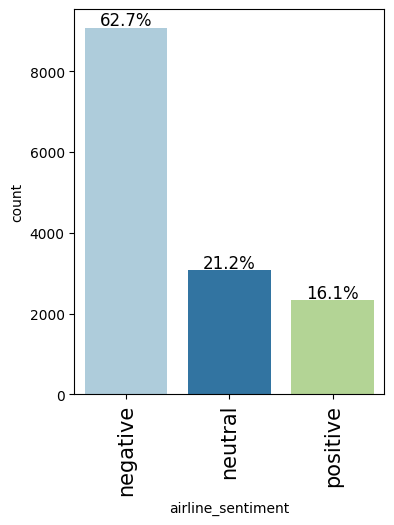

In [36]:
# Barplot of airline_sentiment
labeled_barplot(data, "airline_sentiment", perc = True)

### **Observations**
* The airline sentiment tweet data is very imbalanced  
* The negative tweet count is 9082 or 62.7% and this class is greatly overrepresented
* The neutral tweet count is 3069 or 21.2% and this class is underrepresented
* The positive tweet count is 2334 or 16.1% and this class is significantly underrepresented

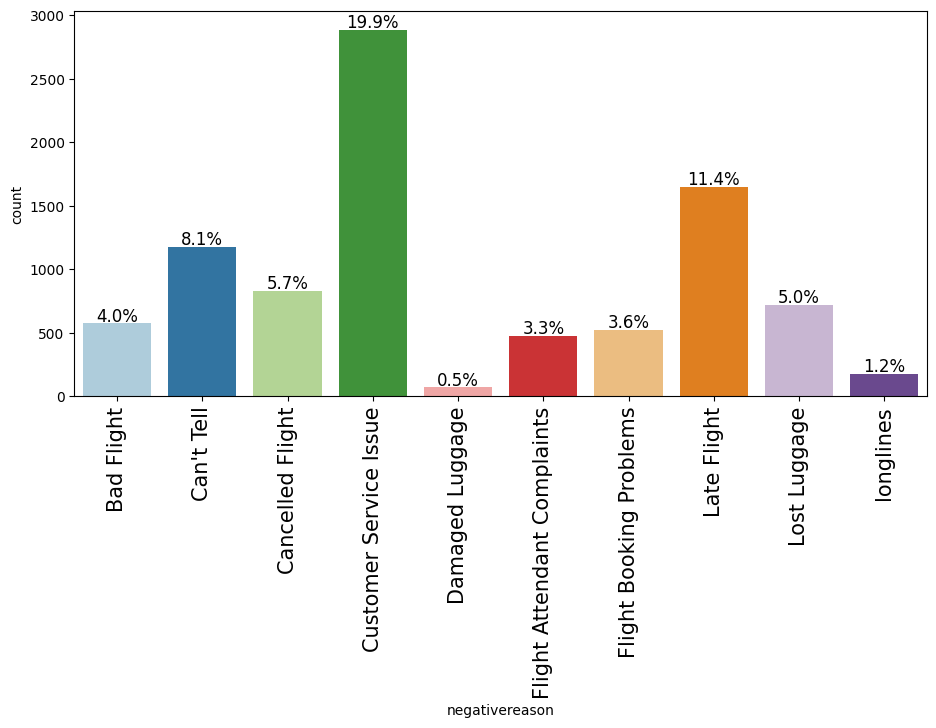

In [37]:
# Barplot for negativereasons
labeled_barplot(data, "negativereason", perc = True)

### **Observations**
* There were 5403 or 37.3% nulls values for this parameter.
* Customer Service Issue - This accounts for 2885 or 31.8% of the non-null data points.
* Late Flight - This accounts for 1650 or 18.2% of the non-null data points.
* Can't Tell - This accounts for 1176 or 12.9% of the non-null data points.
* Cancelled Flight - This accounts for 829 or 9.1% of the non-null data points.
* Lost Luggage - This accounts for 719 or 7.9% of the non-null data points.
* Bad Flight - This accounts for 575 or 6.3% of the non-null data points.
* Flight Booking Problems - This accounts for 5.8% of the non-null data points.
* Longlines - This accounts for 177 or 1.9% 0f the non-null data points.
* Damaged Luggage - This accounts for 73 or 0.8% of the non-null data points.

## ** Discussion Of Remaining Features**

negativereason_gold - There are only 32 non-null data points for this variable and it is not of value for analysis.
airline_sentiment_gold - There are only 40 non-null data points for this variable and it is not of value for analysis.
tweet_coord - There are only 1007 non-null data points for this variable and the tweet coordinate is not of value for analysis.
user_timezone - This parameter has 85 unique values, however, is not pertinent for analyzing tweet sentiment.
tweet_location - This parameter has 3081 unique values, however, is not pertinent for analyzing tweet sentiment.
tweet_id - This parameter is an integer with a unique value for each tweet. It is not pertinent for analyzing tweet sentiment.
name - This is the personal name of the individual generating each tweet. It is not pertinent for analyzing tweet sentiment.
tweet_created - This is the timestamp when a tweet is created. It is not pertinent for analyzing tweet sentiment.


# Multivariate Analysis

### Distribution of Sentiment of tweets for each airline

<Axes: xlabel='airline'>

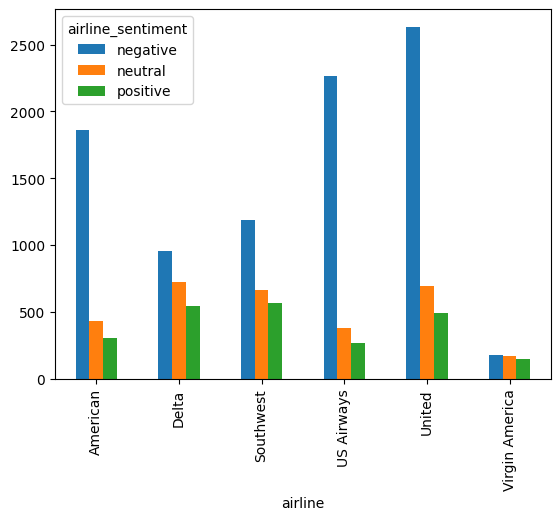

In [38]:
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.

## **Plot The Word Clouds Of Tweets For Positive And Negative Sentiment Separately**

In [39]:
# Filter dataframe for positive airline_sentiment
df_positive = data[data["airline_sentiment"] == "positive"]

In [40]:
# Implement wordcloud for tweets with positive sentiment
import wordcloud
def show_wordcloud(data, title):
    text_cloud = ' '.join(df_positive['text'].astype(str).tolist())                 # Converting text column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text_cloud)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

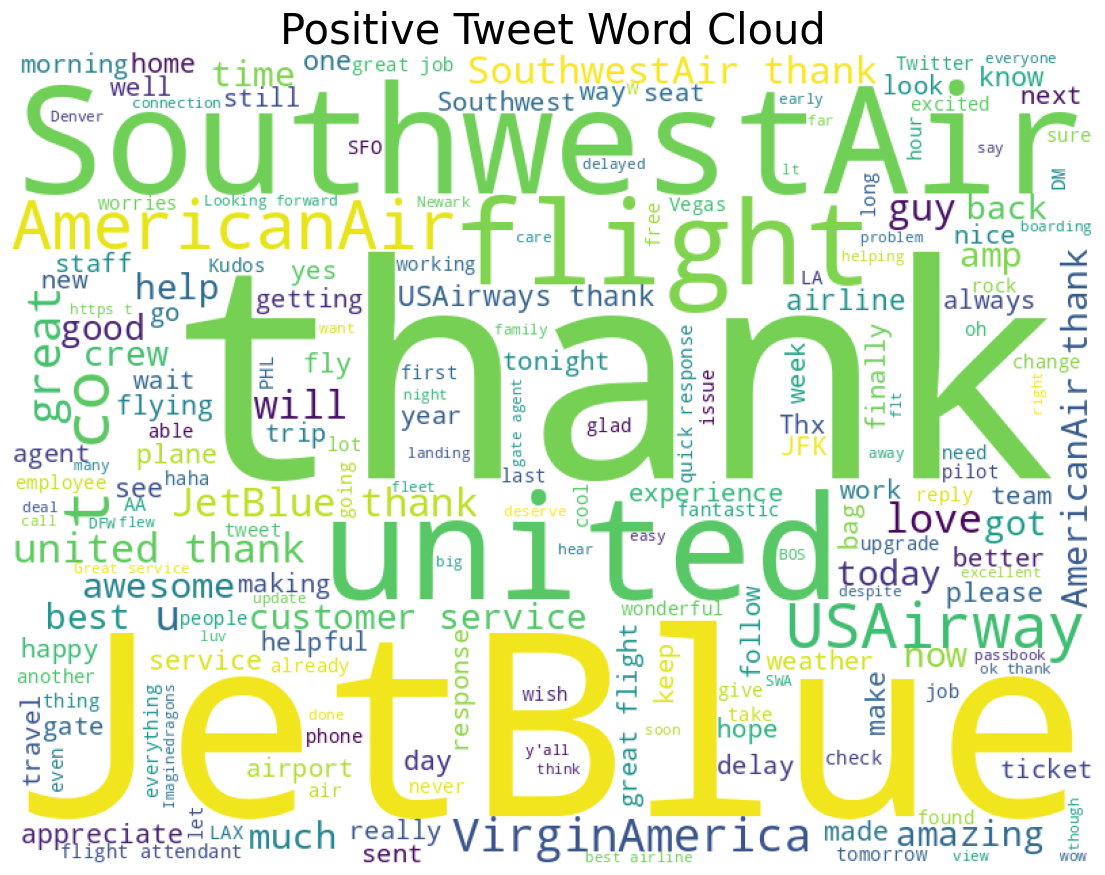

In [41]:
show_wordcloud(data,'Positive Tweet Word Cloud')

###  **Observations**

Many of the words in this plot can be considered positive such as "appreciate", however many of the most frequently used words are the names of airlines. Most frequent words in the word cloud for positive tweets include:

* JetBlue (a large number of tweets labelled "Delta" classification were addressed to "@JetBlue".
* thank
* SouthwestAir
* United
* flight
* AmericanAir



In [42]:
# Filter dataframe for positive airline_sentiment
df_negative = data[data["airline_sentiment"] == "negative"]

In [43]:
# Implement wordcloud for tweets with negative sentiment
import wordcloud
def show_wordcloud(data, title):
    text_cloud = ' '.join(df_negative['text'].astype(str).tolist())                 # Converting text column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text_cloud)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

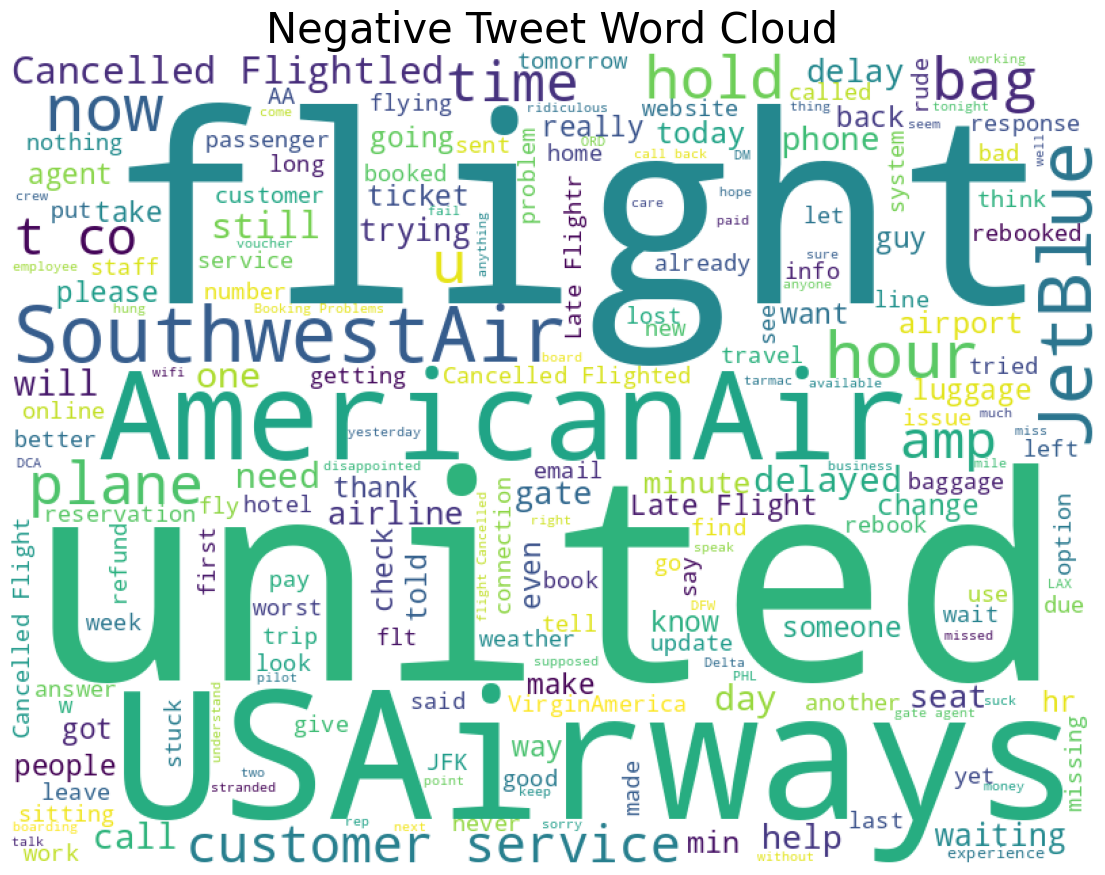

In [44]:
show_wordcloud(data,'Negative Tweet Word Cloud')


###  **Observations**

Many of the words in this plot can be considered negative such as "Late Flight" , however many of the most frequently used words are the names of airlines. Most frequent words in the word cloud for negative tweets include:

* United
* flight
* USAirways
* AmericanAir
* SouthwestAir
* JetBlue (A large number of tweets labelled "Delta" classification were addressed to "@JetBlue"



## **Check The Shape Of the Data**
* Per the project forum discussion with Mentors it is not necessary to delete any of the dataframe columns
* The columns with a large number of null or duplicate values were not deleted per these instructions

In [45]:
# Print dataframe shape
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 14485 rows and 15 columns.


## **Text Pre-processing:**

* Remove html tags
* Replace contractions in string
* Remove numbers
* Tokenization
* Remove special characters and punctuations
* Remove stopwords
* Convert to lower case
* Lemmatize text
* Join words


In [46]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))




<ipython-input-46-2b8e9f910ab9>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [47]:
# Print first 5 rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [48]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

# Print first 5 rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you have added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I did not today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [49]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))




In [50]:
# Print first 5 rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you have added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I did not today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [51]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'  # Matches characters not a letter, digit, or whitespace
    text = re.sub(pattern, '', text)
    return text


data['text'] = data['text'].apply(lambda x: remove_special_characters(x))

In [52]:
# Print first 5 rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,VirginAmerica What dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,VirginAmerica plus you have added commercials to the experience tacky,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,VirginAmerica I did not today Must mean I need to take another trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,VirginAmerica and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [53]:
# Tokenize text using NLTK
import nltk
nltk.download('punkt')
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [54]:
# Print top 5 rows of data after tokenization
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[VirginAmerica, What, dhepburn, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### **Observations
* Text has been tokenized and some text pre-processing has been completed.
* Additional pre-processing and joining still needs to be performed

In [55]:
# Define custom stop-words list to be retained
import nltk
nltk.download('stopwords')

stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


stopwords = list(set(stopwords) - set(customlist))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Complete Text Pre-Processing Implementation**

In [56]:

# Perform following operations in this code block:
# Remove non-ASCII characters
# Lowercase the text
# Remove punctuation
# Remove stopwords
# Lemmatize
# Join words

import nltk
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)



[nltk_data] Downloading package wordnet to /root/nltk_data...


### **Print Top Rows Of DataFrame After All Text Pre-Processing (Satisfies Scoring Rubric Requirement)**

In [57]:
# Print first 5 rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn say,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus add commercials experience tacky,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica not today must mean need take another trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### **Observations**

* Text data has been properly pre-processed in preparation for applying countvectorization and tf-idf
* Many columns have large amounts of null or irrelevant data. Per Mentor instructions in discussion forum, will not delete.

In [58]:
# Print a random sample from dataframe
data.sample(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14365,569626951733932032,negative,1.0,Late Flight,1.0000,American,NaN,macario2,NaN,0,americanair wait flight jfk h newyork viracopos americanairlines httptcofheslpmu,"[40.65062011, -73.79171323]",2015-02-22 14:37:03 -0800,Pocos de Caldas,Brasilia
54,570000071644872704,neutral,1.0,NaN,NaN,Virgin America,NaN,papamurat,NaN,0,virginamerica flight leave dallas la february th,NaN,2015-02-23 15:19:41 -0800,NaN,NaN
2990,568805751386288128,negative,1.0,Customer Service Issue,0.3441,United,NaN,thejoemadison,NaN,0,unite wonderful unfortunately not help hr flight major yous cities disappoint,NaN,2015-02-20 08:13:53 -0800,"Chicago, IL",Central Time (US & Canada)
6722,567721299162968065,negative,1.0,Customer Service Issue,0.6674,Southwest,NaN,kristaallison28,NaN,0,southwestair cancel flightled flight bna today hold hour frustrate,NaN,2015-02-17 08:24:40 -0800,orlando,NaN
11402,568139479237525505,negative,1.0,Lost Luggage,1.0000,US Airways,NaN,BigDavew2k,NaN,0,usairways come home day late flight find guy lose luggage,NaN,2015-02-18 12:06:22 -0800,NaN,NaN
6536,567793635892174848,negative,1.0,Cancelled Flight,1.0000,Southwest,NaN,Faultie,NaN,0,southwestair mcodca flight almost full people screw msydca cancel flightation unite usairways not cancel flight swamistake,"[38.73693556, -90.35367062]",2015-02-17 13:12:06 -0800,D.C.,NaN
6892,570056726793359360,negative,1.0,Late Flight,1.0000,Delta,NaN,djcheros,NaN,0,jetblue not one four flight trip time company problem,NaN,2015-02-23 19:04:49 -0800,"Portland, Maine",Eastern Time (US & Canada)
5866,568536883199746048,neutral,1.0,NaN,NaN,Southwest,NaN,PLLMyObsessionn,NaN,0,southwestair yes please,NaN,2015-02-19 14:25:30 -0800,We know all so follow -A,NaN
11480,568079446592385025,negative,1.0,Cancelled Flight,0.6717,US Airways,NaN,Barrkari,NaN,0,usairways flight today show time online not able check call tell cancel flightled put hold hr ago help,NaN,2015-02-18 08:07:49 -0800,NaN,NaN
14575,569596793941401601,negative,1.0,Customer Service Issue,0.6521,American,NaN,rdaniel10,NaN,0,americanair not guy email address put next available flight ohare,NaN,2015-02-22 12:37:12 -0800,NaN,Eastern Time (US & Canada)


In [59]:
# Print last 5 rows of dataframe
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,americanair thank get different flight chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,americanair leave minutes late flight warn communication minutes late flight call shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,americanair please bring american airlines blackberry,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,americanair money change flight not answer phone suggestions make commitment,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,americanair people need know many seat next flight plz put us standby people next flight,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


## **Model Scoring Metric**

* Accurately classifying tweet sentiment is an important business activity for determining customer satisfaction
* Accuracy will be used as the scoring metric for this modeling exercise (TP+FN)/(TP+TN+FP+FN)

### **Build Model Based on CountVectorizer (BOW) and Random Forest Classifier**

In [60]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features = 3000)
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

### **Observations**

* Attempted to perform the evaluation with max_features set to none and use all 12575 features available
* Used GPU
* Due to computation complexity, max_features parameter was reduced in steps to reach a maximum feasible value of 3000

In [61]:
# Investigate dataframe shape
print(f"There are {data_features.shape[0]} rows and {data_features.shape[1]} columns.")

There are 14485 rows and 3000 columns.


In [62]:
labels = data['airline_sentiment']


In [63]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=1)

In [64]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight = "balanced", random_state = 1)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=1)
0.7084570245081119


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [65]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 50)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [66]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

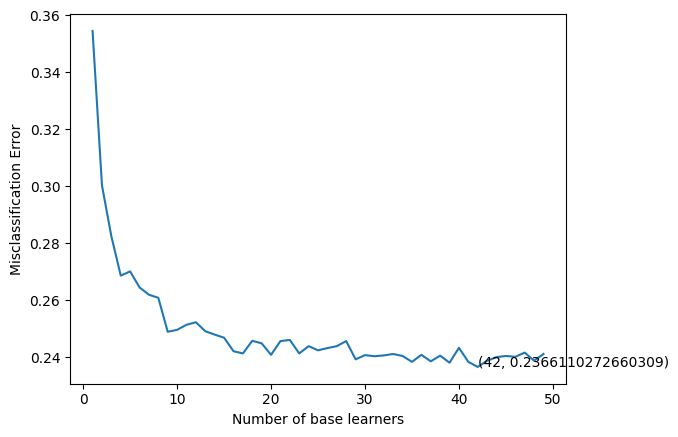

In [67]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [68]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7505752416014726

In [69]:
print(optimal_learners)

42


### **Observations**

* Optimal number of learners is 42
* Accuracy is 0.751


In [70]:
# Obtain model output as probability for each category
y_pred = clf.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [73]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['negative','neutral','positive'],
                     columns = ['negative','neutral','positive'])

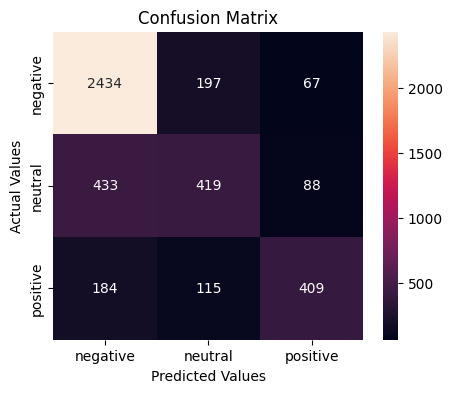

In [74]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### **Observations**

* The test data negative tweets misclassified to a neutral prediction was 197 tweets or 7.3%
* The test data negative tweets misclassified to a positive prediction was 67 tweets or 2.5%
* The test data neutral tweets misclassified to a negative prediction was 433 tweets or 46.1%
* The test data neutral tweets misclassified to a positive prediction was 88 tweets or 9.4%
* The test data positive tweets misclassified to a negative prediction was 184 tweets or 26.0%
* The test data positive tweets misclassified to a neutral prediction was 115 tweets or 16.2%

The three most prevalent misclassifications were:

* 46.1% of neutral tweets were misclassified as negative
* 26.1% of positive tweets were misclassified as negative
* 16.2% of positive tweets were misclassified as neutral


In [75]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.90      0.85      2698
     neutral       0.57      0.45      0.50       940
    positive       0.73      0.58      0.64       708

    accuracy                           0.75      4346
   macro avg       0.70      0.64      0.66      4346
weighted avg       0.74      0.75      0.74      4346



### **Observations**

The overall accuracy is 0.751

The classification performance (precision, recall, and f1-score) for negative tweets exceeded both minority classes:

* For negative tweets (majority class) the precision is 0.80, recall is 0.90, and f1-score is 0.85

* For neutral tweets (minority class) the precision is 0.57, recall is 0.45, and f1-score is 0.50

* For positive tweets (minority class) the precision is 0.73, recall is 0.58, and f1-score is 0.64


### Print A Listing And Word Cloud Of The Top 40 Features

These are the top 40 word cloud features for CountVectorizer and Random Forest:
thank
not
usairways
delay
great
jetblue
flight
unite
southwestair
hours
love
hold
get
americanair
cancel
awesome
wait
bag
call
virginamerica
hour
amaze
service
follow
please
go
help
best
appreciate
plane
customer
time
dm
lose
fleek
fly
worst
make
good
need


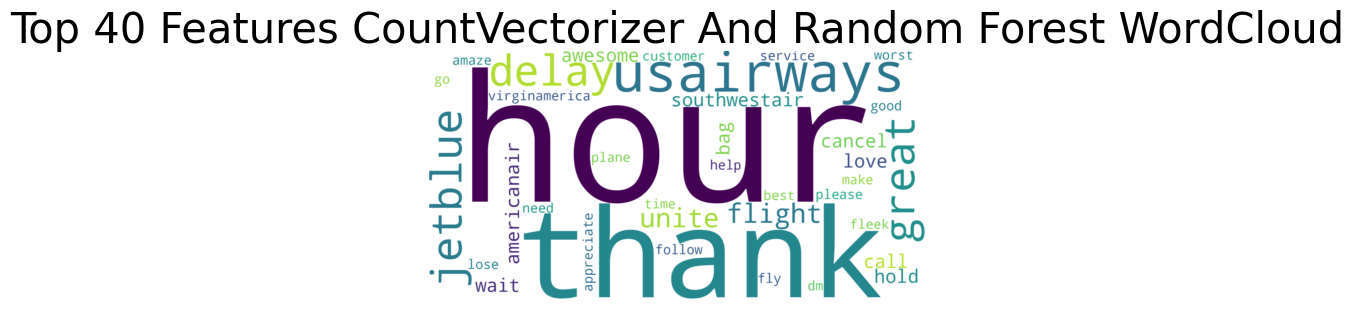

In [76]:
print("These are the top 40 word cloud features for CountVectorizer and Random Forest:")

all_features = bow_vec.get_feature_names_out()
top_features=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    print(all_features[i])
    top_features+=' '



from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 Features CountVectorizer And Random Forest WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### **Observations**

Five of the six airline categories in the study were listed in the top 40 word cloud terms. Delta was not included. Note that Jet Blue was included although it was not included as an the airline class. A large number of the tweets Labelled "Delta" were addressed to "@JetBlue".

Words that could be construed as positive include:

* thank
* love
* awesome
* appreciate
* good

Words that could be construed as negative include:

* delay
* cancel
* wait
* lose
* worst


### **Perform Analysis Using Term Frequency(TF) - Inverse Document Frequency(IDF) And Random Forest**

In [77]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 3000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14485, 3000)

### **Observations**

* Attempted to perform the evaluation with max_features set to none and use all 12575 features available
* Used GPU
* Due to computation complexity, max_features parameter was reduced in steps to reach a maximum feasible value of 3000

In [78]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=1)

In [79]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight = "balanced", random_state = 1)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=1)
0.7125992405937176


In [80]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 50)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [81]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

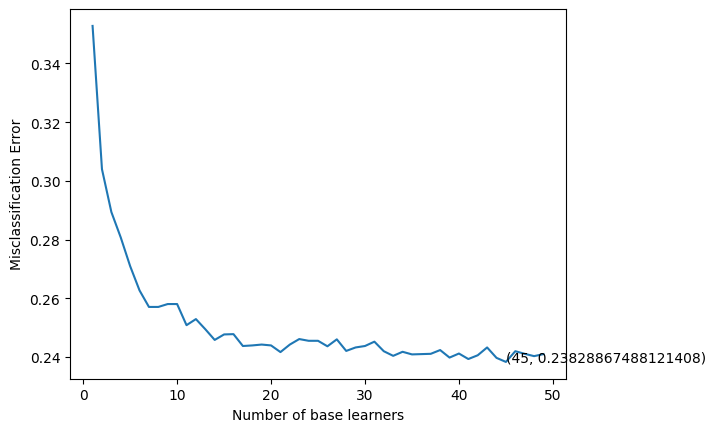

In [82]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [83]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7533364012885412

In [84]:
# Print the optimal number of learners
print(optimal_learners)

45


### **Observations**

* Optimal number of learners is 45
* Accuracy is 0.753


In [85]:
# Obtain model output as probability for each category
y_pred = clf.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [88]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['negative','neutral','positive'],
                     columns = ['negative','neutral','positive'])

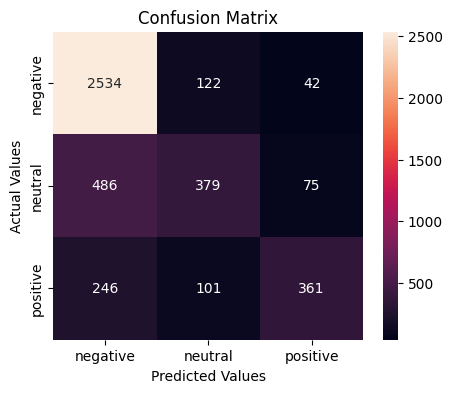

In [89]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### **Observations**

* The test data negative tweets misclassified to a neutral prediction was 122 tweets or 4.5%
* The test data negative tweets misclassified to a positive prediction was 67 tweets or 1.6%
* The test data neutral tweets misclassified to a negative prediction was 486 tweets or 51.7%
* The test data neutral tweets misclassified to a positive prediction was 75 tweets or 8.0%
* The test data positive tweets misclassified to a negative prediction was 246 tweets or 34.7%
* The test data positive tweets misclassified to a neutral prediction was 101 tweets or 14.3%

The three most prevalent misclassifications were:

* 51.7% of neutral tweets were misclassified as negative
* 34.7% of positive tweets were misclassified as negative
* 14.3% of positive tweets were misclassified as neutral


In [90]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.94      0.85      2698
     neutral       0.63      0.40      0.49       940
    positive       0.76      0.51      0.61       708

    accuracy                           0.75      4346
   macro avg       0.72      0.62      0.65      4346
weighted avg       0.74      0.75      0.73      4346



### **Observations**

The overall accuracy is 0.753

The classification performance (precision, recall, and f1-score) for negative tweets exceeded both minority classes:

* For negative tweets the precision is 0.78, recall is 0.94, and f1-score is 0.85

* For neutral tweets the precision is 0.63, recall is 0.40, and f1-score is 0.49

* For positive tweets the precision is 0.76, recall is 0.51, and f1-score is 0.61


These are the top 40 word cloud features for TF-IDF and Random Forest:
thank
not
jetblue
southwestair
usairways
unite
americanair
flight
delay
great
virginamerica
love
get
hours
cancel
bag
hold
awesome
wait
hour
call
please
best
follow
dm
amaze
customer
good
fly
fleek
appreciate
service
time
need
help
make
go
still
much
tomorrow


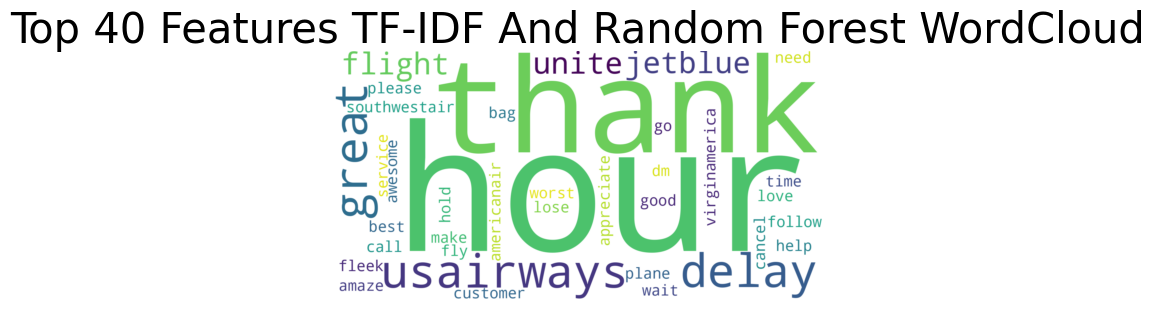

In [91]:
# Print word cloud and top 40 word cloud features for TF-IDF and Random Forest
print("These are the top 40 word cloud features for TF-IDF and Random Forest:")

all_features = vectorizer.get_feature_names_out()
Top_features=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    print(all_features[i])
    Top_features+=' '

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)



# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 Features TF-IDF And Random Forest WordCloud', fontsize=30)
plt.axis("off")
plt.show()



### **Observations**

* Five of the six airline names in the study were listed in the top 40 word cloud terms. Delta was not included. Note that although Jet Blue was not included as a member of the airline classification, many of the tweets classified as "Delta" were addressed to "@JetBlue".

Words that could be construed as positive include:

* thank
* love
* awesome
* appreciate
* good

Words that could be construed as negative include:

* delay
* cancel
* wait
* not
* tomorrow


## **Compare Performance Of CountVectorizer/Random Forest And TF-IDF/Random Forest**









In [92]:
# Build dataframe for testing scores for CountVectorizer and Random Forest
countvect_params = {
        "countvect": [
            "Negative Sentiment",
            "Neutral Sentiment",
            "Positive Sentiment"
        ],
        "Precision" : [0.80, 0.57, 0.73],
        "Recall" : [0.90, 0.45, 0.58],
        "F1-Score" : [0.85, 0.50, 0.64]
    }
df_countvect = pd.DataFrame(countvect_params)
countvect_acc = 0.751

In [93]:
# Build dataframe for testing scores for TF-IDF and Random Forest
tfidf_params = {
        "tfidf": [
            "Negative Sentiment",
            "Neutral Sentiment",
            "Positive Sentiment"
        ],
        "Precision" : [0.78, 0.63, 0.76],
        "Recall" : [0.94, 0.40, 0.51],
        "F1-Score" : [0.85, 0.49, 0.61]
    }
df_tfidf = pd.DataFrame(tfidf_params)
tfidf_acc = 0.753

In [94]:
#Summary for CountVectorizer and Random Forest
#Print test statistics
print("Performance Summary For CountVectorizer And Random Forest")
print("The accuracy is {}".format(countvect_acc))
print(df_countvect)

Performance Summary For CountVectorizer And Random Forest
The accuracy is 0.751
            countvect  Precision  Recall  F1-Score
0  Negative Sentiment       0.80    0.90      0.85
1   Neutral Sentiment       0.57    0.45      0.50
2  Positive Sentiment       0.73    0.58      0.64


In [95]:
#Summary for TF-IDF and Random Forest
#Print test statistics
print("Performance Summary For TF-IDF And Random Forest")
print("The accuracy is {}".format(tfidf_acc))
print(df_tfidf)

Performance Summary For TF-IDF And Random Forest
The accuracy is 0.753
                tfidf  Precision  Recall  F1-Score
0  Negative Sentiment       0.78    0.94      0.85
1   Neutral Sentiment       0.63    0.40      0.49
2  Positive Sentiment       0.76    0.51      0.61


### **Summary**

This project performed a sentiment analysis of airline twitter data.

Duplicated tweets (155) were removed.

Separate word clouds for the positive and negative tweets were presented.

The text data was pre-processed:

* Remove html tags
* Replace contractions in string
* Remove numbers
* Tokenization using NLTK
* Remove special characters and punctuations
* Remove stopwords
* Convert to lower case
* Lemmatize text
* Join words

The pre-processed data was converted to numbers (vectorized), so data could be fed into two models.

Sentiment analysis models using the following methodologies were built:

* CountVectorizer and Random Forest
* TF-IDF and Random Forest

The max_feature parameter in the vectorizer was varied ranging from "None" (maximum features) down to 3000 which was the maximum value which could be processed with the available GPU due to the computational complexity issue.

The Random Forest classifier was trained with the optimal number of learners.

Future study can apply other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques to increase the overall accuracy even further.

After building the classification model, the test data results were predicted.

Combining TF-IDF with a Random Forest classifier had a very slightly higher accuracy than CountVectorization with Random Forest. The combination of TF-IDF with a Random Forest classifier is the recommended option based on the accuracy scoring:

* TF-IDF and Random Forest Classifier Accuracy: 0.753
* CountVectorizer and Random Forest Classifier Accuracy: 0.751

The combination of TF-IDF and Random Forest also had a greater recall for negative tweets (0.94) than CountVectorizer and Random Forest (0.90). A high recall for negative tweets is very desirable for identifying customer satisfaction concerns.

For both modeling approaches the precision, recall, and F1-Score for the minority classes (neutral and positive) tweets were lower than for the negative tweet class.

The recall for neutral and positive sentiment tweets was very low. This was due to a significant fraction of both neutral and negative tweets being misclassified as negative tweets:

* For TF-IDF and Random Forest, 51.7% of the neutral tweets were mis-classified as negative
* For TF-IDF and Random Forest, 37.7% of the positive tweets were mis-classified as negative


## **Key Findings And Recommendations**

These are key findings and recommendations:

The recommended model is TF-IDF with Random Forest with an accuracy of 0.753.

Airlines should concentrate on addressing causes for negative tweets. The following data population suggests satisfied customers are less prone to tweet about airlines:

* Negative tweets - 62.7%
* Neutral tweets - 21.2%
* Positive tweets - 16.1%

Although not part of the scoring rubricfor this project, future study should perform further analysis of the reasons for negative tweets for six airlines that were the subject of tweets.

Although Jet Blue was not a member of the airline classification, it did appear in many tweets which were classified as "Delta" but addressed to "@JetBlue".  Further study to add Jet Blue as an airline classification name may add value.

Some key reasons for negative tweets are factors completely under airline control. Efforts should be concentrated in addressing these negative tweet reasons:

* Customer Service Issue - 19.9%
* Cancelled Flight - 5.7%
* Lost Luggage - 5.0%
* Flight Booking Problems - 3.6%

Although this data was not available, airlines would benefit from determining whether persons who are members of their loyalty programs are tweeting negatively.  The opinion of loyalty club members should receive heavier weighting.

The negativereason_confidence parameter has a median of 0.67 and mean of 0.64. Further study should consider whether negative tweets with a high negativereason_confidence should carry more weight.



Although not part of the scoring rubric for this exercise, VADER sentiment analysis which is optimized for social media, should be considered for future study.

